# 4. Evaluation Metrics for Classification

In the previous session we trained a model for predicting churn. How do we know if it's good?


In [83]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [84]:
# Import libraries for building model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer

In [85]:
# Load dataset
df_car = pd.read_csv("../database/churn.csv")

In [86]:
df_car.columns = df_car.columns.str.lower().str.replace(" ", "_")

In [87]:
categorical_col = list(df_car.select_dtypes(include=["object"]))
numerical_col = list(df_car.select_dtypes(exclude=["object"]))

In [88]:
categorical_col

['customerid',
 'gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'totalcharges',
 'churn']

In [89]:
# totalcharges column need to be nummerical
df_car["totalcharges"] = pd.to_numeric(df_car["totalcharges"], errors="coerce")

In [90]:
df_car.totalcharges.fillna(0, inplace=True)

In [91]:
categorical_col.remove("totalcharges")
categorical_col

['customerid',
 'gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'churn']

In [92]:
numerical_col.append("totalcharges")

In [93]:
# Normalize categorical columns
for col in categorical_col:
    df_car[col] = df_car[col].str.lower().str.replace(" ", "_")

In [94]:
# Convert churn column to True and False
df_car.churn = df_car.churn.apply(lambda x: True if x == "yes" else False)

In [95]:
# Split dataset
df_train_full, df_test = train_test_split(df_car, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn
y_val = df_val.churn
y_test =df_test.churn


del df_train["churn"] # df_train.drop(columns=["churn"], axis=1, inplace=True)
del df_val["churn"]
del df_test["churn"]

In [96]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4225 entries, 0 to 4224
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        4225 non-null   object 
 1   gender            4225 non-null   object 
 2   seniorcitizen     4225 non-null   int64  
 3   partner           4225 non-null   object 
 4   dependents        4225 non-null   object 
 5   tenure            4225 non-null   int64  
 6   phoneservice      4225 non-null   object 
 7   multiplelines     4225 non-null   object 
 8   internetservice   4225 non-null   object 
 9   onlinesecurity    4225 non-null   object 
 10  onlinebackup      4225 non-null   object 
 11  deviceprotection  4225 non-null   object 
 12  techsupport       4225 non-null   object 
 13  streamingtv       4225 non-null   object 
 14  streamingmovies   4225 non-null   object 
 15  contract          4225 non-null   object 
 16  paperlessbilling  4225 non-null   object 


In [97]:
numerical_col

['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges']

In [98]:
categorical_col

['customerid',
 'gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'churn']

In [99]:
# Encode catergorical variables
categorical_col.remove("churn")
dv = DictVectorizer()

In [100]:
categorical_col.remove("customerid")

In [101]:
dict_train = df_train[categorical_col+numerical_col].to_dict(orient="records")

In [102]:
categorical_col

['gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod']

In [103]:
dv.fit(dict_train)
X_train = dv.transform(dict_train)

In [104]:
dv.feature_names_

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [105]:
# Model
model = LogisticRegression()
model.fit(X_train, y_train)

d:\Anacoda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [106]:
# Score on training set
model.score(X_train, y_train)

0.8054437869822485

In [113]:
model.coef_

array([[ 4.72130525e-01, -1.74089107e-01, -4.06051491e-01,
        -3.01838813e-02, -7.78261922e-02,  6.28293651e-02,
        -8.99052168e-02, -8.09342218e-02, -3.44528232e-02,
        -7.35572503e-02, -3.33341443e-01,  3.15236586e-01,
        -8.99052168e-02,  3.72183038e-03, -2.58132276e-01,
         1.41034594e-01,  9.08760879e-03,  6.26331281e-02,
        -8.99052168e-02, -8.07379847e-02,  2.64680518e-01,
        -8.99052168e-02, -2.82785375e-01, -2.30999492e-01,
         1.22989418e-01, -1.65963045e-01,  5.79529719e-02,
        -8.66614456e-02, -3.19509493e-02,  7.02644522e-02,
        -5.96621308e-02,  1.41034594e-01, -2.49044668e-01,
         2.14525129e-01, -1.19332974e-01, -8.99052168e-02,
         1.01228117e-01, -7.01130418e-02, -8.99052168e-02,
         5.20081852e-02,  2.12728215e-01, -8.99052168e-02,
        -2.30833072e-01, -7.03611827e-02,  3.81593772e-04]])

In [108]:
dv.feature_names_

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [116]:
for feat, coef in zip(dv.feature_names_, model.coef_[0,:]):
    print(feat, round(coef, 4))

contract=month-to-month 0.4721
contract=one_year -0.1741
contract=two_year -0.4061
dependents=no -0.0302
dependents=yes -0.0778
deviceprotection=no 0.0628
deviceprotection=no_internet_service -0.0899
deviceprotection=yes -0.0809
gender=female -0.0345
gender=male -0.0736
internetservice=dsl -0.3333
internetservice=fiber_optic 0.3152
internetservice=no -0.0899
monthlycharges 0.0037
multiplelines=no -0.2581
multiplelines=no_phone_service 0.141
multiplelines=yes 0.0091
onlinebackup=no 0.0626
onlinebackup=no_internet_service -0.0899
onlinebackup=yes -0.0807
onlinesecurity=no 0.2647
onlinesecurity=no_internet_service -0.0899
onlinesecurity=yes -0.2828
paperlessbilling=no -0.231
paperlessbilling=yes 0.123
partner=no -0.166
partner=yes 0.058
paymentmethod=bank_transfer_(automatic) -0.0867
paymentmethod=credit_card_(automatic) -0.032
paymentmethod=electronic_check 0.0703
paymentmethod=mailed_check -0.0597
phoneservice=no 0.141
phoneservice=yes -0.249
seniorcitizen 0.2145
streamingmovies=no -0.1

In [118]:
dict_test = df_test.to_dict(orient="records")
X_test = dv.transform(dict_test)

In [119]:
model.score(X_test, y_test)

0.8090844570617459

In [120]:
dict_val = df_val.to_dict(orient="records")
X_val = dv.transform(dict_val)
model.score(X_val, y_val)

0.8034066713981547

## 4.2 Accuracy and dummy model

In [122]:
from sklearn.metrics import accuracy_score
from collections import Counter

In [136]:
thresholds = np.linspace(0, 1, 21)

In [148]:
y_train_prob = model.predict_proba(X_train)[:, 1]

In [134]:
(y_train == (y_train_prob>0.5)).mean()

0.8054437869822485

In [143]:
acc = []

for element in thresholds:
    acc.append(accuracy_score(y_train, (y_train_pred>element)))

for thres, value in zip(thresholds, acc):
    print('%.2f %.3f' % (round(thres,2), round(value, 3)))

0.00 0.269
0.05 0.503
0.10 0.596
0.15 0.656
0.20 0.697
0.25 0.739
0.30 0.764
0.35 0.780
0.40 0.794
0.45 0.800
0.50 0.805
0.55 0.804
0.60 0.794
0.65 0.783
0.70 0.771
0.75 0.748
0.80 0.735
0.85 0.732
0.90 0.731
0.95 0.731
1.00 0.731


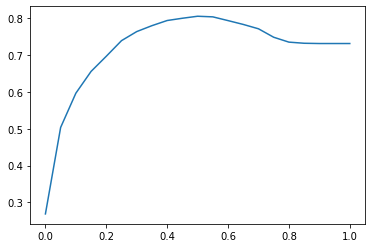

In [138]:
plt.plot(thresholds, acc)

## 4.3 Confusion table, matrix

In [155]:
y_train.sum()

1135

In [149]:
y_train_pred = y_train_prob>0.5

In [163]:
TP = (y_train_pred & y_train).sum()
TP

624

In [164]:
TN = ((~y_train_pred) & (~y_train)).sum()
TN

2779

In [162]:
FP = (y_train_pred & ~y_train).sum()
FP

311

In [167]:
FN = ((~y_train_pred) & y_train).sum()
FN

511

In [186]:
def confusion_matrix(y_pred, y_true):
    TP = (y_true & y_pred).sum()
    TN = (~y_true & ~y_pred).sum()
    FP = (y_pred & ~y_true).sum()
    FN = (~y_pred & y_true).sum()
    return np.array([[TP, FN], [FP, TN]])

In [176]:
y_val_pred = model.predict(X_val)
matrix_val = confusion_matrix(y_val_pred, y_val)
matrix_val/matrix_val.sum()

array([[0.14904187, 0.07168204],
       [0.12491128, 0.6543648 ]])

## Precision and Recall

In [178]:
# Precision is the ratio between true positive and predicted positive
# Recall is the ration between true positive and actual positive
precision = TP/(TP + FP)
precision

0.667379679144385

In [179]:
recall = TP / (TP + FN)
recall

0.5497797356828193

## ROC curve
- ROC stands for Receiver Operating Characteristics.
- ROC curve measures the relationship between FALSE POSITIVE RATE (FPR) and TRUE POSTITIVE RATE (TPR) which are derived from confusion matrix.
    - FPR is the fraction of False Positive over the total number of actual Negative (TN + FP). We want to minimise FPR.
    $$FPR = \frac{FP}{FP+TN}$$
    - TPR is the fraction of True Positive over the total number of actual Positive (TP + FN). We want to maximise TPR
    $$TPR = \frac{TP}{TP+FN}$$



In [187]:
# Calculate confusion matrix for validation set
confusion_val = confusion_matrix(y_val_pred, y_val)
TP_val = confusion_val[0, 0]
FN_val = confusion_val[0, 1]
FP_val = confusion_val[1, 0]
TN_val = confusion_val[1, 1]

In [188]:
confusion_val

array([[210, 176],
       [101, 922]], dtype=int64)

In [189]:
TPR_val = TP_val/(TP_val + FN_val)
TPR_val

0.5440414507772021

In [190]:
FPR_val = FP_val/(FP_val + TN_val)
FPR_val

0.09872922776148582

In [193]:
# Calculate FPR, TPR for different thresholds
y_val_prob_pred = model.predict_proba(X_val)[:, 1]
y_val_prob_pred

array([0.0090737 , 0.20311052, 0.21065783, ..., 0.13686293, 0.79940083,
       0.83695071])

In [196]:
def confusion_matrix_with_threshold(y_prob_pred, y_actual, threshold):
    y_pred = (y_prob_pred > threshold)
    TP = (y_actual & y_pred).sum()
    TN = (~y_actual & ~y_pred).sum()
    FP = (~y_actual & y_pred).sum()
    FN = (y_actual & ~y_pred).sum()
    return np.array([[TP, FN], [FP, TN]])

In [198]:
accuracy_score_val = []
thresholds = np.linspace(0, 1, 101)
for t in thresholds:
    matrix = confusion_matrix_with_threshold(y_val_prob_pred, y_val, t)
    accuracy_score_val.append((t, matrix[0, 0], matrix[0, 1], matrix[1, 0], matrix[1, 1]))
accuracy_score_val    

[(0.0, 386, 0, 1023, 0),
 (0.01, 385, 1, 913, 110),
 (0.02, 384, 2, 829, 194),
 (0.03, 383, 3, 766, 257),
 (0.04, 381, 5, 716, 307),
 (0.05, 379, 7, 685, 338),
 (0.06, 377, 9, 660, 363),
 (0.07, 372, 14, 641, 382),
 (0.08, 371, 15, 613, 410),
 (0.09, 369, 17, 580, 443),
 (0.1, 366, 20, 556, 467),
 (0.11, 365, 21, 528, 495),
 (0.12, 365, 21, 510, 513),
 (0.13, 360, 26, 478, 545),
 (0.14, 355, 31, 453, 570),
 (0.15, 351, 35, 435, 588),
 (0.16, 347, 39, 418, 605),
 (0.17, 346, 40, 400, 623),
 (0.18, 344, 42, 384, 639),
 (0.19, 338, 48, 370, 653),
 (0.2, 333, 53, 355, 668),
 (0.21, 330, 56, 339, 684),
 (0.22, 324, 62, 322, 701),
 (0.23, 320, 66, 311, 712),
 (0.24, 316, 70, 303, 720),
 (0.25, 308, 78, 291, 732),
 (0.26, 304, 82, 281, 742),
 (0.27, 303, 83, 269, 754),
 (0.28, 296, 90, 257, 766),
 (0.29, 291, 95, 244, 779),
 (0.3, 285, 101, 236, 787),
 (0.31, 280, 106, 230, 793),
 (0.32, 279, 107, 225, 798),
 (0.33, 276, 110, 220, 803),
 (0.34, 274, 112, 213, 810),
 (0.35000000000000003, 271,

In [199]:
# Create Dataframe from list of lists
columns = ["threshold", "TP", "FN", "FP", "TN"]
df_score_val = pd.DataFrame(accuracy_score_val, columns=columns)
df_score_val

,threshold,TP,FN,FP,TN
0,0.00,386,0,1023,0
1,0.01,385,1,913,110
2,0.02,384,2,829,194
3,0.03,383,3,766,257
4,0.04,381,5,716,307
...,...,...,...,...,...
96,0.96,0,386,0,1023
97,0.97,0,386,0,1023
98,0.98,0,386,0,1023
99,0.99,0,386,0,1023


In [206]:
df_score_val["TPR"] = df_score_val["TP"]/(df_score_val["TP"] + df_score_val["FN"])
df_score_val["FPR"] = df_score_val["FP"]/(df_score_val["FP"] + df_score_val["TN"])
df_score_val

,threshold,TP,FN,FP,TN,TPR,FPR
0,0.00,386,0,1023,0,1.000000,1.000000
1,0.01,385,1,913,110,0.997409,0.892473
2,0.02,384,2,829,194,0.994819,0.810362
3,0.03,383,3,766,257,0.992228,0.748778
4,0.04,381,5,716,307,0.987047,0.699902
...,...,...,...,...,...,...,...
96,0.96,0,386,0,1023,0.000000,0.000000
97,0.97,0,386,0,1023,0.000000,0.000000
98,0.98,0,386,0,1023,0.000000,0.000000
99,0.99,0,386,0,1023,0.000000,0.000000


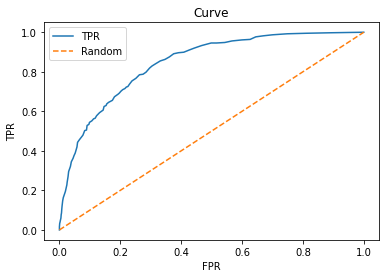

In [205]:
df_score_val.plot(x= "FPR", y = "TPR", title="Curve")
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

## AUC for ROC

In [207]:
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

0.843951802835306

In [ ]:
# Return area under ROC curve
auc(df_score_val.FPR, df_score_val.TPR)

In [208]:
fpr, tpr, thresholds = roc_curve(y_val, y_val_prob_pred)

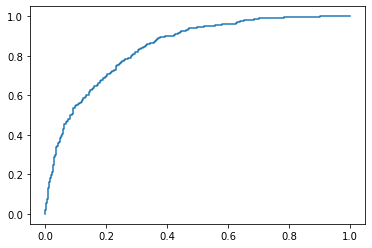

In [213]:
plt.plot(fpr, tpr, label="ROC curve")

In [214]:
roc_auc_score(y_val, y_val_prob_pred)

0.843863167864505

## KFold cross validation

In [215]:
from sklearn.model_selection import KFold

In [216]:
def train_cross_validation(df_train, y_train):
    dicts = df_train[categorical_col+numerical_col].to_dict(orient="records")
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
    model.fit(X_train, y_train)
    return dv, model

In [220]:
def predict(model, dv, df_val):
    dicts = df_val[categorical_col+numerical_col].to_dict(orient="records")
    X_val = dv.transform(dicts)
    y_val_pred_prob = model.predict_proba(X_val)
    return y_val_pred_prob[:, 1]

In [218]:
dv, model = train_cross_validation(df_train, y_train)

In [221]:
predict(model, dv, df_val)

array([0.00899236, 0.20439205, 0.21208496, ..., 0.13636512, 0.79979601,
       0.83742907])

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
